In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读入图片
main_image = plt.imread("./image/第一次作业/1646067055260.png",0) #设置alpha通道
main_image.shape

(375, 554, 3)

In [2]:
# SVD_For_image
def SVD_image(rate):
    n_sigma=np.round(375*rate).astype("int") #因为图片大小为（375,554,3）所以依照375取百分比
    result=np.zeros(main_image.shape)
    for channel in range(0,3):
        # 奇异值分解
        U,sigma,V=np.linalg.svd(main_image[:,:,channel])
        # 构建奇异值矩阵
        S=np.diag(sigma[:n_sigma])
        #得到截断奇异值结果
        result[:,:,channel]=(U[:,0:n_sigma].dot(S)).dot(V[0:n_sigma,:])
        #归一化到[0,1]
        MAX=np.max(result[:,:,channel])
        MIN=np.min(result[:,:,channel])
        result[:,:, channel] = ((result[:,:,channel]-MIN) / (MAX-MIN))
    result=np.round(result*255).astype("int")
    return result

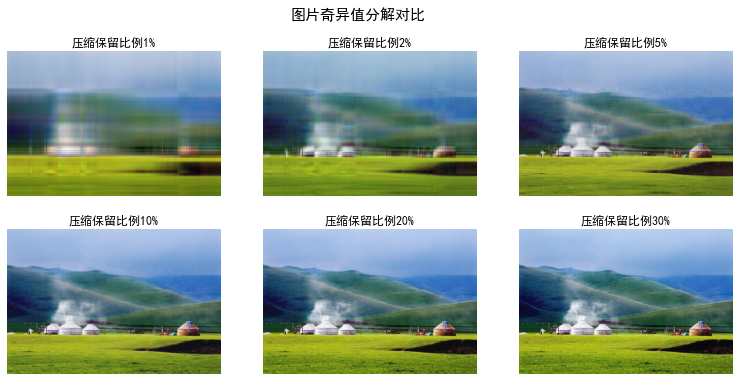

In [9]:
plt.figure(figsize =(13,6))
plt.suptitle("图片奇异值分解对比",fontsize = 15)
count = 0
for rate in (0.01,0.02,0.05,0.1,0.2,0.3):
    count += 1
    ax = plt.subplot(int("23"+str(count)))
    ax.set_title("压缩保留比例"+str(format(rate,".0%")))
    pic = SVD_image(rate)
    ax.imshow(pic)
    plt.axis("off")
plt.savefig("output.png",dpi=500)